<a href="https://colab.research.google.com/github/Reham-f1/California-Housing-Data-Analysis/blob/main/California_Housing_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Objective: Determine the most suitable housing option in California
# by analyzing key features such as median house value, population size,
# housing median age, number of households, and total number of rooms per region.


In [ ]:
# # At the beginning, I wanted to simulate a real work environment like in companies.
# So, I created an account with a (render) service provider and selected PostgreSQL as the database type,
# then named the database and obtained the hosting information to establish a connection.
# After successfully connecting to the server hosting the database,
# I uploaded the dataset to it and proceeded with the data analysis.

!pip install psycopg2-binary

In [ ]:
# Import necessary libraries for data handling, visualization, and database connectivity
import psycopg2                     # For connecting to PostgreSQL databases
import pandas as pd                # For data manipulation and analysis
import seaborn as sns              # For advanced data visualization
import matplotlib.pyplot as plt    # For basic plotting and visualization
import numpy as np                 # For numerical operations
import matplotlib.ticker as ticker # For customizing axis ticks in plots
from sqlalchemy import create_engine  # For creating a database connection engine


In [ ]:
# Connection info from Render
host = 'dXXXXXXXXXXXXXXXXXXXXXXXXXX.com'
database = 'miXXXXXXXXXXXXr'
user = 'miXXXXXXXXXXr_user'
password = '1XXXXXXXXXXXXXXXXXXXXXXXX'
port = '5432'

# Attempt to establish a connection to the PostgreSQL database using the provided credentials.
# If the connection is successful, print a confirmation message and close the connection.
# If an error occurs during the connection process, catch the exception and print an error message.
try:
    conn = psycopg2.connect( host=host, database=database,user=user, password=password,  port=port )

    print(" complated ")
    conn.close()

except psycopg2.Error as e:
    print("failed")
    print("message is :", e)

 complated 


In [ ]:
# Load the dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/housing.csv')

# Create a SQLAlchemy engine to connect to the PostgreSQL database using the provided credentials
engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}")

# Upload the dataset to the PostgreSQL database
# This will create (or replace) a table named 'cal_dataset' and insert all data from the DataFrame
df.to_sql('cal_dataset', engine, if_exists='replace', index=False)




640

In [ ]:
# Read the data from the 'cal_dataset' table in the PostgreSQL database into a DataFrame
Fdata = pd.read_sql('SELECT * FROM "cal_dataset";', engine)

# Display the last 5 rows of the DataFrame to verify the data was loaded correctly
Fdata.tail(5)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
# Check for zero values in the dataset
# In this dataset, columns are not expected to contain zeros because values like
# total_rooms, total_bedrooms, population, etc., should logically be greater than zero.
# This check helps identify missing or incorrect data entries.
zero_counts = (Fdata == 0).sum()

print("Number of zero values in each column:")
print(zero_counts)



Number of zero values in each column:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
# Logical check: total_bedrooms should not exceed total_rooms
# Since total_rooms includes bedrooms and other rooms (like kitchen, bathroom, etc.),
# it's logically incorrect for total_bedrooms to be greater than total_rooms.
# This filter helps identify any data entry errors or inconsistencies in the dataset.
invalid_rows = Fdata[Fdata["total_bedrooms"] > Fdata["total_rooms"]]

# Number of illogical rows
print(f"\nNumber of illogical rows: {len(invalid_rows)}")

# Display the results  if there are any
print("Rows where total_bedrooms is greater than total_rooms:")
print(invalid_rows)





Number of illogical rows: 0
Rows where total_bedrooms is greater than total_rooms:
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


In [ ]:
# Remove rows where total_bedrooms is greater than total_rooms if was
#Fdata = Fdata[Fdata["total_bedrooms"] <= Fdata["total_rooms"]]


In [ ]:
# Check for missing (null) values in each column of the DataFrame
Fdata.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
# Display a summary of the DataFrame, including column names, data types, and non-null counts
Fdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


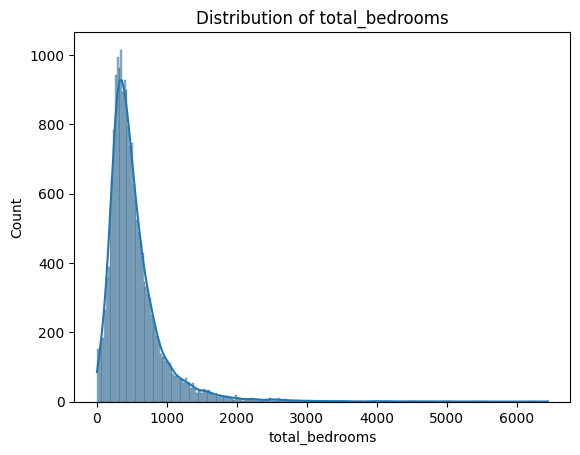

In [ ]:
# Visualize the distribution of the 'total_bedrooms' column
# This column contains missing values, so the plot helps identify ( outliers or skewness)
# to decide whether to fill the null values using the median, mean, or another method

sns.histplot(Fdata['total_bedrooms'], kde=True)
plt.title('Distribution of total_bedrooms')
plt.show()

In [ ]:
# Fill missing values in the 'total_bedrooms' column using the median per region (This is more accurate than applying the same median to all regions.)
# First, calculate the median 'total_bedrooms' for each 'ocean_proximity' group
medians_by_region = Fdata.groupby('ocean_proximity')['total_bedrooms'].median()

# Define a function to fill missing values with the corresponding regional median
def fill_bedrooms(row):
    if pd.isna(row['total_bedrooms']):
        return medians_by_region[row['ocean_proximity']]
    else:
        return row['total_bedrooms']

# Apply the function to fill missing values in the 'total_bedrooms' column
Fdata['total_bedrooms'] = Fdata.apply(fill_bedrooms, axis=1)



In [ ]:
# to check
print(Fdata['total_bedrooms'].isnull().sum())


0


In [ ]:
# Check for duplicate rows in the DataFrame
Fdata.duplicated().sum()

np.int64(0)

In [ ]:
# Check if each location (based on longitude and latitude) is unique in the dataset
# This helps identify if there are duplicate geographic entries
# The result showed that some locations appear more than once with slightly different details,
# which is acceptable as long as the values are reasonably close — this could represent different units at the same location
duplicates = Fdata[Fdata.duplicated(subset=['longitude', 'latitude'], keep=False)]
duplicates


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20598,-121.58,39.15,38.0,1756.0,396.0,837.0,401.0,1.9122,55500.0,INLAND
20599,-121.56,39.16,35.0,2157.0,441.0,1009.0,409.0,1.5827,63000.0,INLAND
20600,-121.57,39.16,18.0,1632.0,367.0,769.0,330.0,3.1029,71700.0,INLAND
20614,-121.54,39.08,26.0,2276.0,460.0,1455.0,474.0,2.4695,58000.0,INLAND


In [ ]:
# Starting the analysis below

In [ ]:
# Median population count for each region (based on 'ocean_proximity')
medians_by_region = Fdata.groupby('ocean_proximity')['population'].median().sort_values(ascending=False)
medians_by_region

# This helps buyers see which regions have more people,
# indicating if the area is busier or more peaceful.


,population
ocean_proximity,
<1H OCEAN,1247.0
NEAR OCEAN,1136.5
INLAND,1124.0
NEAR BAY,1033.5
ISLAND,733.0


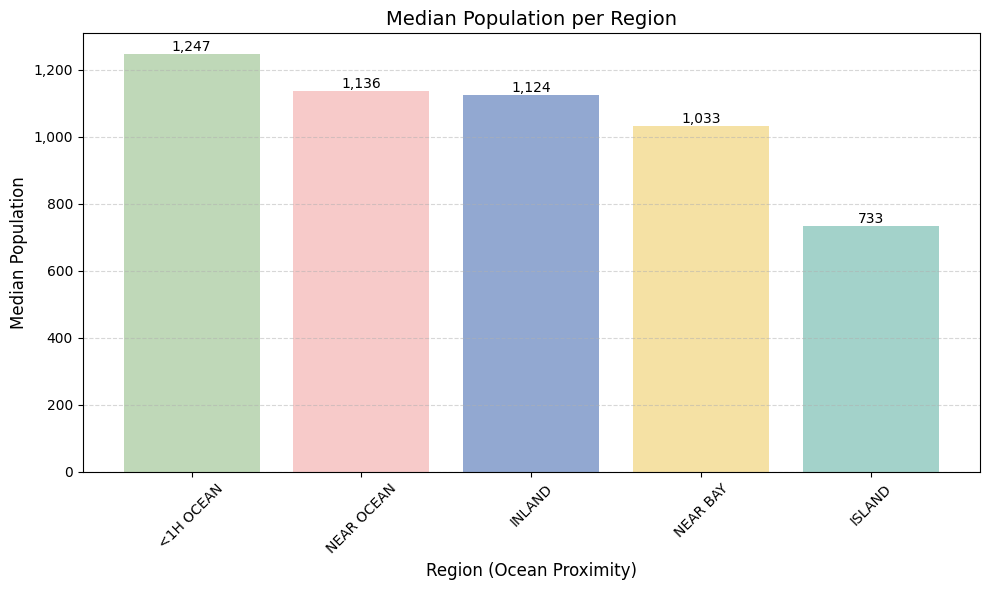

In [ ]:
# Visualizing the median population by region (last output)

soft_colors_new = ['#BFD8B8', '#F7CAC9', '#92A8D1', '#F5E1A4', '#A3D2CA']
plt.figure(figsize=(10, 6))
bars = plt.bar(medians_by_region.index, medians_by_region.values, color=soft_colors_new)

plt.title('Median Population per Region', fontsize=14)
plt.ylabel('Median Population', fontsize=12)
plt.xlabel('Region (Ocean Proximity)', fontsize=12)

plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [ ]:
# Median households count for each region (based on 'ocean_proximity')
medians_by_region = Fdata.groupby('ocean_proximity')['households'].median().sort_values(ascending=False)
medians_by_region

# This step helps to understand the typical number of households (or homes) in each area.


,households
ocean_proximity,
NEAR OCEAN,429.0
<1H OCEAN,421.0
NEAR BAY,406.0
INLAND,385.0
ISLAND,288.0


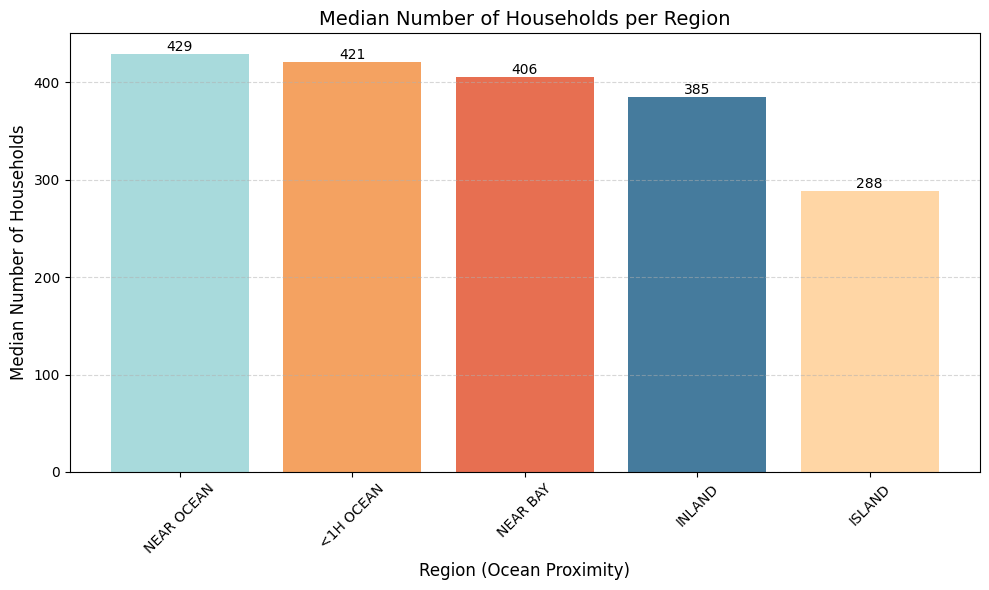

In [ ]:
# Visualizing the median households count by region (last output)

plt.figure(figsize=(10, 6))
soft_colors = ['#A8DADC', '#F4A261', '#E76F51', '#457B9D', '#FFD6A5']
bars = plt.bar(medians_by_region.index, medians_by_region.values, color=soft_colors)

plt.title('Median Number of Households per Region', fontsize=14)
plt.ylabel('Median Number of Households', fontsize=12)
plt.xlabel('Region (Ocean Proximity)', fontsize=12)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# disply the valuse uper eche colum
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Median income for each region (based on 'ocean_proximity')
medians_by_region = Fdata.groupby('ocean_proximity')['median_income'].median().sort_values(ascending=False)
medians_by_region


,median_income
ocean_proximity,
<1H OCEAN,3.87500
NEAR BAY,3.81865
NEAR OCEAN,3.64705
INLAND,2.98770
ISLAND,2.73610


In [ ]:
# Median house_value (house price in USD) for each region (based on 'ocean_proximity')
medians_by_region = Fdata.groupby('ocean_proximity')['median_house_value'].median().sort_values(ascending=False)
medians_by_region

,median_house_value
ocean_proximity,
ISLAND,414700.0
NEAR BAY,233800.0
NEAR OCEAN,229450.0
<1H OCEAN,214850.0
INLAND,108500.0


In [ ]:
# Preparing to compare (median income and house value) by converting from USD to SAR

df_grouped = Fdata.groupby('ocean_proximity')[['median_income', 'median_house_value']].median()

# converting from USD to SAR
# Note: median_income is originally in units of 10,000 USD, which is why i multiply by 10,000
df_grouped['income_SAR'] = df_grouped['median_income'] * 10000 * 3.75
df_grouped['house_value_SAR'] = df_grouped['median_house_value'] * 3.75
df_grouped = df_grouped.sort_values(by='income_SAR', ascending=False)

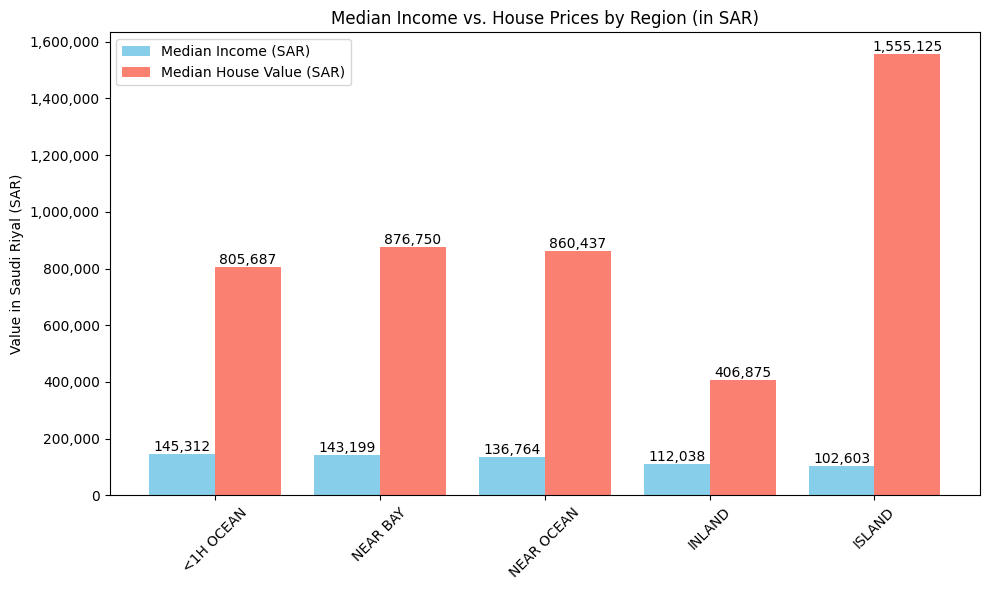

In [ ]:
# Visualizing the comparison

bar_width = 0.4
indices = np.arange(len(df_grouped))
fig, ax = plt.subplots(figsize=(10,6))

bars_income = ax.bar(indices - bar_width/2, df_grouped['income_SAR'], width=bar_width, label='Median Income (SAR)', color='skyblue')
bars_house = ax.bar(indices + bar_width/2, df_grouped['house_value_SAR'], width=bar_width, label='Median House Value (SAR)', color='salmon')

ax.set_xticks(indices)
ax.set_xticklabels(df_grouped.index, rotation=45)

# Labels
ax.set_ylabel('Value in Saudi Riyal (SAR)')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Display the value above each bar for income bars
for bar in bars_income:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}',
            ha='center', va='bottom', fontsize=10)

# Display the value above each bar for house value bars
for bar in bars_house:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}',
            ha='center', va='bottom', fontsize=10)

ax.set_title('Median Income vs. House Prices by Region (in SAR)')
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Median total_rooms count for each region (based on 'ocean_proximity')
medians_by_region = Fdata.groupby('ocean_proximity')['total_rooms'].median().sort_values(ascending=False)
medians_by_region


,total_rooms
ocean_proximity,
NEAR OCEAN,2195.0
INLAND,2131.0
<1H OCEAN,2108.0
NEAR BAY,2083.0
ISLAND,1675.0


In [ ]:
# Calculating how many rooms are in each house on average for every region
# by dividing the total number of rooms by the total number of households
avg_rooms_per_region = (
    Fdata.groupby('ocean_proximity')
    .agg({'total_rooms': 'sum', 'households': 'sum'})
)

avg_rooms_per_region['avg_rooms_per_household'] = (
    avg_rooms_per_region['total_rooms'] / avg_rooms_per_region['households']
)

# Display only the final result, sorted in descending order
result=avg_rooms_per_region['avg_rooms_per_household'].sort_values(ascending=False)
result
# the below valuse gives an indirect indication of (house size) in each region —
# the higher the average, the larger or more subdivided the houses are likely to be.



,avg_rooms_per_household
ocean_proximity,
ISLAND,5.692697
INLAND,5.692233
NEAR OCEAN,5.154572
NEAR BAY,5.103371
<1H OCEAN,5.076522


/tmp/ipython-input-3315261339.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


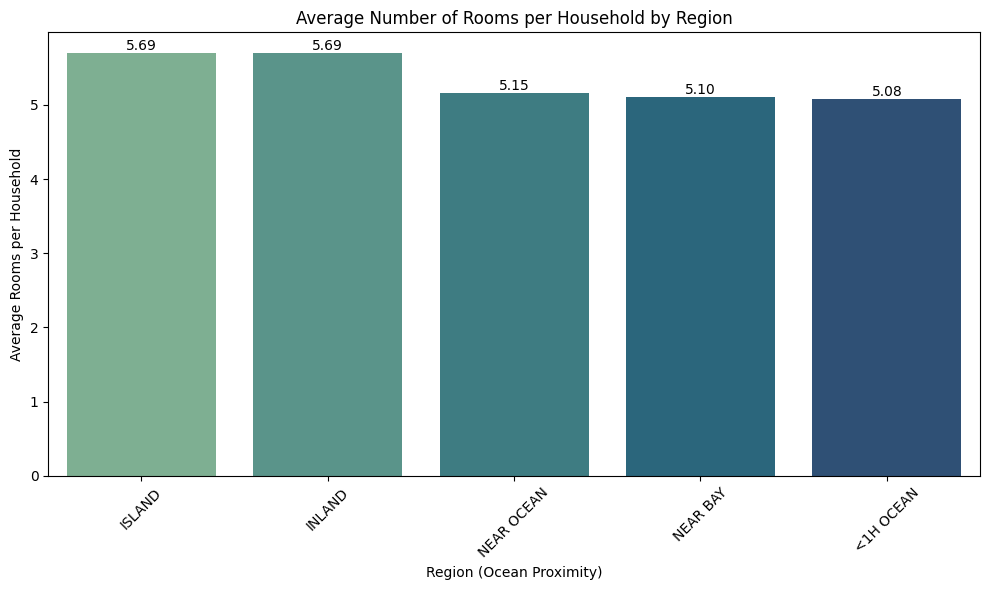

In [ ]:
# Visualizing how many rooms are in each house on average for every region (last output)
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x=result.index,
    y=result.values,
    palette="crest"
)

plt.title('Average Number of Rooms per Household by Region')
plt.xlabel('Region (Ocean Proximity)')
plt.ylabel('Average Rooms per Household')
plt.xticks(rotation=45)


for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

In [ ]:
# Median housing_median_age (in years) for each region (based on 'ocean_proximity')
medians_by_region = Fdata.groupby('ocean_proximity')['housing_median_age'].median().sort_values(ascending=False)
medians_by_region

# This step helps buyers understand whether homes in each region are generally old or new,
# based on the median age of houses.


,housing_median_age
ocean_proximity,
ISLAND,52.0
NEAR BAY,39.0
<1H OCEAN,30.0
NEAR OCEAN,29.0
INLAND,23.0


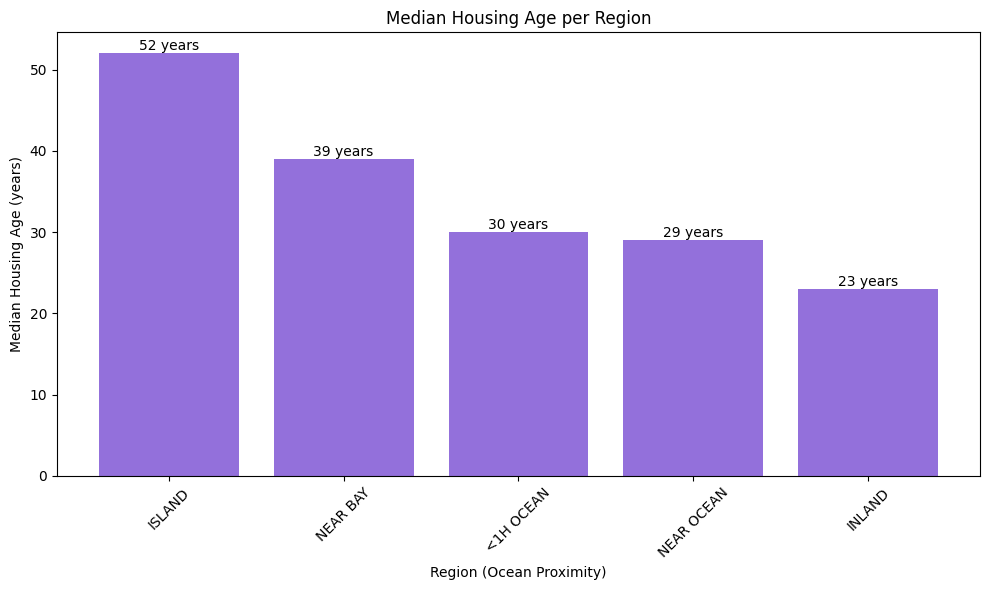

In [ ]:
# Visualizing the median housing age (in years) for each region (based on 'ocean_proximity')

plt.figure(figsize=(10, 6))
bars = plt.bar(medians_by_region.index, medians_by_region.values, color='mediumpurple')

plt.title('Median Housing Age per Region')
plt.xlabel('Region (Ocean Proximity)')
plt.ylabel('Median Housing Age (years)')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)} years',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()